# Introduction: Quantum Inspired Stock Predictions
Background:
Financial data is highly volatile and difficult to predict using supervised learning methods such as Deep Learning. Quantum systems are able to capture complex relations and hold probabilities for multiple outcomes. We assume that a there is a quantum wave that is able to make good predictions on the stock market, but we don't attempt to create the quantum circuit, we reverse engineer it using data.



Questions to address
- What is the goal?
- What is the motivation?
- How do we use data to achieve this?

# What is the goal?
The goal is to use machine learning methods to approximate a quantum wave that predicts stock market prices on the S&P500. We can leverage quantum properties like entanglement and interferance to obtain financial predictions, but what wave or circuit would lead to such predictions? This wave becomes our target function and we use data to approxiamate it. What better then the transformer architecture to obtain this quantum wave? The transformer can pick up on non-local relationships and volatiility inherent in quantum systems. We start by approximating the target function using simpler models and built up the transformer.

# What is the motivation?
Assuming that quantum systems can model financial data, there is promise in employing machine learning models to reverse engineer this wave.

# How do we use data to achieve this?
We use closing prices on stocks as our data, but we transform each closing price into a wave. The way to represent this wave is with a probability distribution contained in a vector. Some ways to do this are to represent each closing price as a gaussian distribution where the mean represents that value to collapse to. But quantum probability distributions are likely to be more volatile then that so we attempt a Fast Fourier Transform, as well as combinations of the two approaches. The learning algorithm will output a wave that we can collapse into a stock price prediction for the next day.

![Modeling machine learning problems](./MLFD_Learning.png)

Credits: Machine Learning From Data, Malik Magdon-Ismail and Yaser Abu-Mostafa

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.fft import fft, ifft
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Training Examples
The data is transformed into waves using a Fast Fourier Transform.

In [19]:
# Define the stock and date range
start = '1980-01-01'
end = '2024-08-10'
stock = '^GSPC'

# Download the stock data
yfd = yf.download(stock, start=start, end=end)

# Prepare the DataFrame
df = pd.DataFrame({'Close': yfd['Close']})
df = df.dropna().reset_index()

# Convert dates to numerical values
t = pd.to_datetime(df['Date'])
t = (t - t.min()) / np.timedelta64(1, 'D')  # Time in days since start
t = t.values
print(t[:10], t.shape)

[*********************100%***********************]  1 of 1 completed

[ 0.  1.  2.  5.  6.  7.  8.  9. 12. 13.] (11246,)


### Gaussian Pulses Approach

0.0 16291.0
(10000,) (10000,)
(10000,)


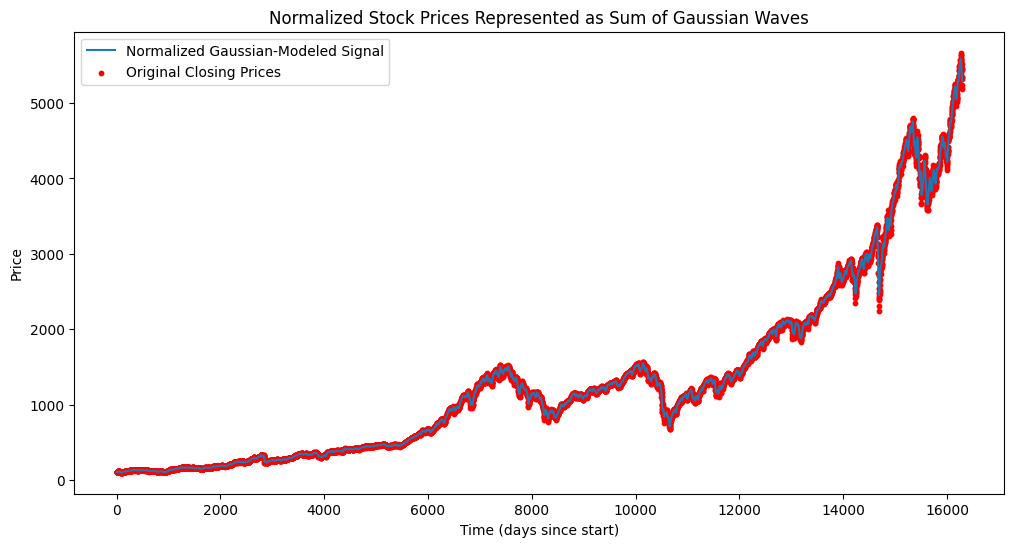

In [41]:
# Create a high-resolution time axis for the continuous signal
t_min, t_max = t.min(), t.max()
print(t_min, t_max)
t_continuous = np.linspace(t_min, t_max, num=10000)
signal = np.zeros_like(t_continuous)
print(t_continuous.shape, signal.shape)
gaussian_basis_sum = np.zeros_like(t_continuous)  # To store the sum of Gaussians

# Standard deviation for the Gaussian pulses
sigma = 5  # Adjust this value as needed
n = len(df)  # Number of stock prices
m = len(t_continuous)  # Length of the continuous time axis
gaussian_matrix = np.zeros((n, m))

# Sum of Gaussian pulses and Gaussian basis functions
for i in range(len(df)):
    A = df['Close'][i]
    t0 = t[i]
    # Gaussian pulse with amplitude A
    gaussian_pulse = A * np.exp(-((t_continuous - t0) ** 2) / (2 * sigma ** 2))
    signal += gaussian_pulse
    gaussian_matrix[i, :] = gaussian_pulse
    # Gaussian basis function with amplitude 1
    gaussian_basis = np.exp(-((t_continuous - t0) ** 2) / (2 * sigma ** 2))
    gaussian_basis_sum += gaussian_basis

# normalize the signal
normalized_signal = signal / gaussian_basis_sum
print(normalized_signal.shape)

# Plot the normalized signal
plt.figure(figsize=(12, 6))
plt.plot(t_continuous, normalized_signal, label='Normalized Gaussian-Modeled Signal')
plt.scatter(t, df['Close'], color='red', s=10, label='Original Closing Prices')
plt.title('Normalized Stock Prices Represented as Sum of Gaussian Waves')
plt.xlabel('Time (days since start)')
plt.ylabel('Price')
plt.legend()
plt.show()


### Fast Fourier Transform + Gaussian Approach

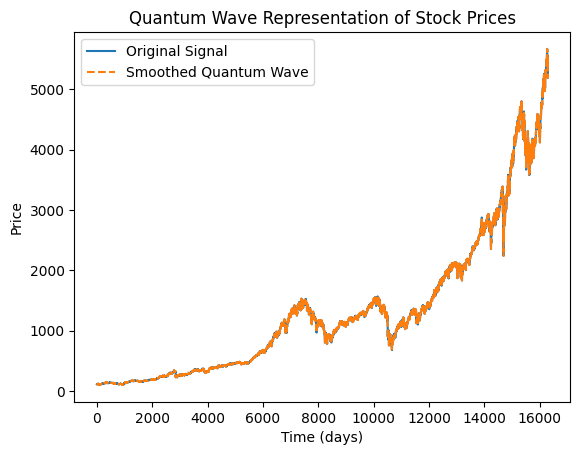

In [44]:
# Apply FFT to the stock prices
fft_result = np.fft.fft(df['Close'].values)
freq = np.fft.fftfreq(len(df['Close']), d=(t[1] - t[0]))

# Apply a Gaussian filter in the frequency domain
sigma_freq = 10  # Standard deviation for the Gaussian in frequency domain
gaussian_filter = np.exp(-freq**2 / (2 * sigma_freq**2))
filtered_fft_result = fft_result * gaussian_filter

# Apply inverse FFT to get the smoothed signal in the time domain
smoothed_signal = np.fft.ifft(filtered_fft_result)

# Plot the original vs. smoothed signal
plt.plot(t, df['Close'].values, label='Original Signal')
plt.plot(t, smoothed_signal.real, label='Smoothed Quantum Wave', linestyle='--')
plt.title('Quantum Wave Representation of Stock Prices')
plt.xlabel('Time (days)')
plt.ylabel('Price')
plt.legend()
plt.show()


# NEXT Question:
# How do we represent the FFT frequency outputs as probability distribution for the model.

## Learning Algorithm